## Add cancer analysis

Analysis of results from `run_add_cancer_classification.py`.

We hypothesized that adding cancers in a principled way (e.g. by similarity to the target cancer) would lead to improved performance relative to both a single-cancer model (using only the target cancer type), and a pan-cancer model using all cancer types without regard for similarity to the target cancer.

Script parameters:
* RESULTS_DIR: directory to read experiment results from
* IDENTIFIER: {gene}\_{cancer_type} target identifier to plot results for

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
RESULTS_DIR = os.path.join(cfg.repo_root, 'add_cancer_results', 'add_cancer')

### Load data

In [3]:
add_cancer_df = au.load_add_cancer_results(RESULTS_DIR, load_cancer_types=True)
print(add_cancer_df.shape)
add_cancer_df.sort_values(by=['gene', 'holdout_cancer_type']).head()

(10272, 12)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,num_train_cancer_types,how_to_add,identifier,train_cancer_types
0,0.98128,0.96627,BRAF,COAD,signal,42,train,0,2,similarity,BRAF_COAD,UCEC COAD THCA
1,0.74925,0.44968,BRAF,COAD,signal,42,test,0,2,similarity,BRAF_COAD,UCEC COAD THCA
2,0.93750,0.89993,BRAF,COAD,signal,42,cv,0,2,similarity,BRAF_COAD,UCEC COAD THCA
3,0.98493,0.97138,BRAF,COAD,signal,42,train,1,2,similarity,BRAF_COAD,UCEC COAD THCA
4,0.64394,0.45539,BRAF,COAD,signal,42,test,1,2,similarity,BRAF_COAD,UCEC COAD THCA


In [4]:
# load data from previous single-cancer and pan-cancer experiments
# this is to put the add cancer results in the context of our previous results
pancancer_dir = os.path.join(cfg.results_dir, 'pancancer')
pancancer_dir2 = os.path.join(cfg.results_dir, 'vogelstein_s1_results', 'pancancer')
single_cancer_dir = os.path.join(cfg.results_dir, 'single_cancer')
single_cancer_dir2 = os.path.join(cfg.results_dir, 'vogelstein_s1_results', 'single_cancer')

In [5]:
single_cancer_df1 = au.load_prediction_results(single_cancer_dir, 'single_cancer')
single_cancer_df2 = au.load_prediction_results(single_cancer_dir2, 'single_cancer')
single_cancer_df = pd.concat((single_cancer_df1, single_cancer_df2))
print(single_cancer_df.shape)
single_cancer_df.head()

(20772, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99987,0.99879,MAP3K1,BRCA,signal,42,train,0,single_cancer,MAP3K1_BRCA
1,0.72689,0.46638,MAP3K1,BRCA,signal,42,test,0,single_cancer,MAP3K1_BRCA
2,0.72844,0.38910,MAP3K1,BRCA,signal,42,cv,0,single_cancer,MAP3K1_BRCA
3,0.99860,0.98630,MAP3K1,BRCA,signal,42,train,1,single_cancer,MAP3K1_BRCA
4,0.74887,0.48700,MAP3K1,BRCA,signal,42,test,1,single_cancer,MAP3K1_BRCA


In [6]:
pancancer_df1 = au.load_prediction_results(pancancer_dir, 'pancancer')
pancancer_df2 = au.load_prediction_results(pancancer_dir2, 'pancancer')
pancancer_df = pd.concat((pancancer_df1, pancancer_df2))
print(pancancer_df.shape)
pancancer_df.head()

(20784, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.95820,0.68399,MAP3K1,BRCA,signal,42,train,0,pancancer,MAP3K1_BRCA
1,0.69619,0.40796,MAP3K1,BRCA,signal,42,test,0,pancancer,MAP3K1_BRCA
2,0.62527,0.20878,MAP3K1,BRCA,signal,42,cv,0,pancancer,MAP3K1_BRCA
3,0.98367,0.82884,MAP3K1,BRCA,signal,42,train,1,pancancer,MAP3K1_BRCA
4,0.77170,0.44885,MAP3K1,BRCA,signal,42,test,1,pancancer,MAP3K1_BRCA


In [7]:
single_cancer_comparison_df = au.compare_results(single_cancer_df,
                                                 identifier='identifier',
                                                 metric='aupr',
                                                 correction=True,
                                                 correction_alpha=0.001,
                                                 verbose=False)
pancancer_comparison_df = au.compare_results(pancancer_df,
                                             identifier='identifier',
                                             metric='aupr',
                                             correction=True,
                                             correction_alpha=0.001,
                                             verbose=False)
experiment_comparison_df = au.compare_results(single_cancer_df,
                                              pancancer_df=pancancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=True,
                                              correction_alpha=0.05,
                                              verbose=False)
experiment_comparison_df.sort_values(by='corr_pval').head(n=10)

,identifier,delta_mean,p_value,corr_pval,reject_null
329,SMAD4_HNSC,0.319513,0.000004,0.001648,True
56,ARID1A_STAD,0.110541,0.000184,0.027420,True
241,FBXW7_LUSC,0.317024,0.000127,0.027420,True
242,NF1_SARC,0.405654,0.000442,0.039537,True
154,KDM5C_KIRC,-0.349511,0.000394,0.039537,True
375,NF1_BLCA,0.201823,0.000560,0.041698,True
427,JAK2_UCEC,0.394205,0.000854,0.054526,False
412,BRAF_SKCM,-0.186559,0.001091,0.059650,False
160,PPP2R1A_UCS,0.273885,0.001201,0.059650,False
309,SMAD4_LUAD,0.212423,0.001585,0.063753,False


### Plot change in performance as cancers are added

In [8]:
IDENTIFIER = 'BRAF_COAD'
# IDENTIFIER = 'EGFR_ESCA'
# IDENTIFIER = 'EGFR_LGG'
# IDENTIFIER = 'KRAS_CESC'
# IDENTIFIER = 'PIK3CA_ESCA'
# IDENTIFIER = 'PIK3CA_STAD'
# IDENTIFIER = 'PTEN_COAD'
# IDENTIFIER = 'PTEN_BLCA'
# IDENTIFIER = 'TP53_OV'
# IDENTIFIER = 'NF1_GBM'

GENE = IDENTIFIER.split('_')[0]

Text(0, 0.5, 'AUPR')

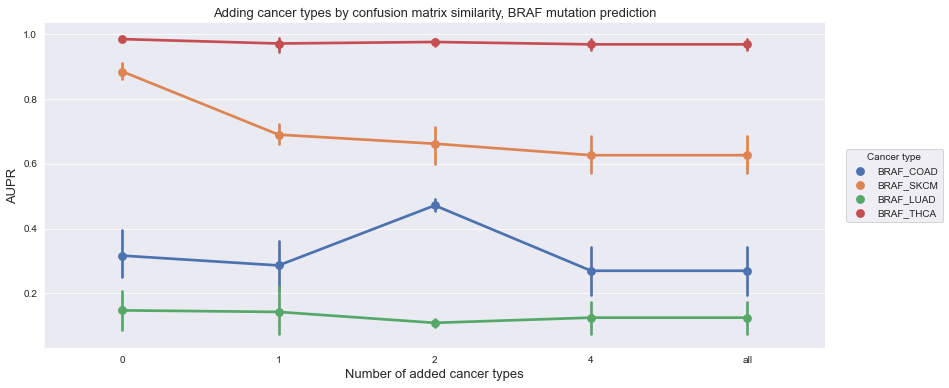

In [9]:
gene_df = add_cancer_df[(add_cancer_df.gene == GENE) &
                        (add_cancer_df.data_type == 'test') &
                        (add_cancer_df.signal == 'signal')].copy()

# make seaborn treat x axis as categorical
gene_df.num_train_cancer_types = gene_df.num_train_cancer_types.astype(str)
gene_df.loc[(gene_df.num_train_cancer_types == '-1'), 'num_train_cancer_types'] = 'all'

sns.set({'figure.figsize': (14, 6)})
sns.pointplot(data=gene_df, x='num_train_cancer_types', y='aupr', hue='identifier',
              order=['0', '1', '2', '4', 'all'])
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center right', borderaxespad=0., title='Cancer type')
plt.title('Adding cancer types by confusion matrix similarity, {} mutation prediction'.format(GENE), size=13)
plt.xlabel('Number of added cancer types', size=13)
plt.ylabel('AUPR', size=13)

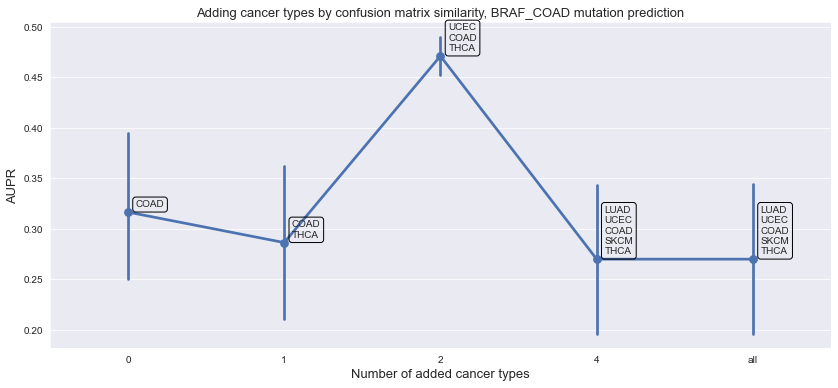

In [10]:
id_df = add_cancer_df[(add_cancer_df.identifier == IDENTIFIER) &
                      (add_cancer_df.data_type == 'test') &
                      (add_cancer_df.signal == 'signal')].copy()

# make seaborn treat x axis as categorical
id_df.num_train_cancer_types = id_df.num_train_cancer_types.astype(str)
id_df.loc[(id_df.num_train_cancer_types == '-1'), 'num_train_cancer_types'] = 'all'

sns.set({'figure.figsize': (14, 6)})
cat_order = ['0', '1', '2', '4', 'all']
sns.pointplot(data=id_df, x='num_train_cancer_types', y='aupr', hue='identifier',
              order=cat_order)
plt.legend([],[], frameon=False)
plt.title('Adding cancer types by confusion matrix similarity, {} mutation prediction'.format(IDENTIFIER),
          size=13)
plt.xlabel('Number of added cancer types', size=13)
plt.ylabel('AUPR', size=13)

# annotate points with cancer types
def label_points(x, y, cancer_types, gene, ax):
    a = pd.DataFrame({'x': x, 'y': y, 'cancer_types': cancer_types})
    for i, point in a.iterrows():
        if gene in ['TP53', 'PIK3CA'] and point['x'] == 4:
            ax.text(point['x']+0.05,
                    point['y']+0.005,
                    str(point['cancer_types'].replace(' ', '\n')),
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'),
                    ha='left', va='center')
        else:
            ax.text(point['x']+0.05,
                    point['y']+0.005,
                    str(point['cancer_types'].replace(' ', '\n')),
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

cat_to_loc = {c: i for i, c in enumerate(cat_order)}
group_id_df = (
    id_df.groupby(['num_train_cancer_types', 'train_cancer_types'])
         .mean()
         .reset_index()
)
label_points([cat_to_loc[c] for c in group_id_df.num_train_cancer_types],
             group_id_df.aupr,
             group_id_df.train_cancer_types,
             GENE,
             plt.gca())

### Plot gene/cancer type "best model" performance vs. single/pan-cancer models

In [11]:
id_df = add_cancer_df[(add_cancer_df.identifier == IDENTIFIER) &
                      (add_cancer_df.data_type == 'test')].copy()

best_num = (
    id_df[id_df.signal == 'signal']
         .groupby('num_train_cancer_types')
         .mean()
         .reset_index()
         .sort_values(by='aupr', ascending=False)
         .iloc[0, 0]
)
print(best_num)
best_id_df = (
    id_df.loc[id_df.num_train_cancer_types == best_num, :]
         .drop(columns=['num_train_cancer_types', 'how_to_add', 'train_cancer_types'])
)
best_id_df['train_set'] = 'best_add'
sc_id_df = (
    id_df.loc[id_df.num_train_cancer_types == 1, :]
         .drop(columns=['num_train_cancer_types', 'how_to_add', 'train_cancer_types'])
)
sc_id_df['train_set'] = 'single_cancer'
pc_id_df = (
    id_df.loc[id_df.num_train_cancer_types == -1, :]
         .drop(columns=['num_train_cancer_types', 'how_to_add', 'train_cancer_types'])
)
pc_id_df['train_set'] = 'pancancer'
all_id_df = pd.concat((sc_id_df, best_id_df, pc_id_df), sort=False)
all_id_df.head()

2


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,identifier,train_set
1,0.5000,0.43056,BRAF,COAD,shuffled,42,test,0,BRAF_COAD,single_cancer
4,0.5000,0.33333,BRAF,COAD,shuffled,42,test,1,BRAF_COAD,single_cancer
7,0.5000,0.41667,BRAF,COAD,shuffled,42,test,2,BRAF_COAD,single_cancer
10,0.5000,0.38889,BRAF,COAD,shuffled,42,test,3,BRAF_COAD,single_cancer
1,0.5403,0.18644,BRAF,COAD,signal,42,test,0,BRAF_COAD,single_cancer


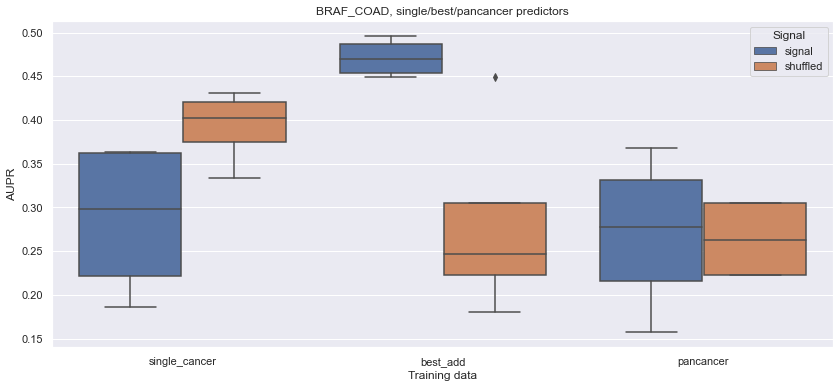

In [12]:
sns.set()
sns.boxplot(data=all_id_df, x='train_set', y='aupr', hue='signal', hue_order=['signal', 'shuffled'])
plt.title('{}, single/best/pancancer predictors'.format(IDENTIFIER))
plt.xlabel('Training data')
plt.ylabel('AUPR')
plt.legend(title='Signal')

In [13]:
print('Single cancer significance: {}'.format(
    single_cancer_comparison_df.loc[single_cancer_comparison_df.identifier == IDENTIFIER, 'reject_null'].values[0]
))
print('Pan-cancer significance: {}'.format(
    pancancer_comparison_df.loc[pancancer_comparison_df.identifier == IDENTIFIER, 'reject_null'].values[0]
))

Single cancer significance: False
Pan-cancer significance: False


In [14]:
# Q2: where is this example in the single vs. pan-cancer volcano plot?
# see pancancer only experiments for an example of this sort of thing

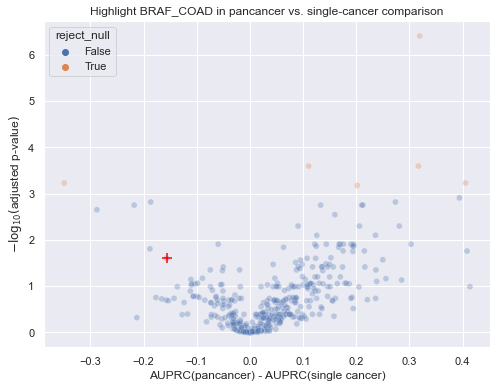

In [15]:
experiment_comparison_df['nlog10_p'] = -np.log(experiment_comparison_df.corr_pval)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=experiment_comparison_df, x='delta_mean', y='nlog10_p',
                hue='reject_null', alpha=0.3)
plt.xlabel('AUPRC(pancancer) - AUPRC(single cancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Highlight {} in pancancer vs. single-cancer comparison'.format(IDENTIFIER))

def highlight_id(x, y, val, ax, id_to_plot):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == id_to_plot:
            ax.scatter(point['x'], point['y'], color='red', marker='+', s=100)
        
highlight_id(experiment_comparison_df.delta_mean,
             experiment_comparison_df.nlog10_p,
             experiment_comparison_df.identifier,
             plt.gca(),
             IDENTIFIER)

Overall, these results weren't quite as convincing as we were expecting. Although there are a few gene/cancer type combinations where there is a clear improvement when one or two relevant cancer types are added, overall there isn't much change in many cases (see first line plots of multiple cancer types).

Biologically speaking, this isn't too surprising for a few reasons:

* Some genes aren’t drivers in certain cancer types
* Some genes have very cancer-specific effects
* Some genes (e.g. TP53) have very well-preserved effects across all cancers

We think there could be room for improvement as far as cancer type selection (some of the cancers chosen don't make a ton of sense), but overall we're a bit skeptical that this approach will lead to models that generalize better than a single-cancer model in most cases.